In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
%matplotlib inline

In [3]:
c1 = 'k' # black
c2 = '#003399' # blue
c3 = '#CC0033' # red
c4 = '#339900' # green
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.linewidth"] = 1.

#### less busy-looking GCE plots

In [60]:
data = Table.read('../elemental-basis/data/star_data.fits', format='fits')
data.remove_row(-1)

In [5]:
elements = ['OI', 'NaI', 'MgI', 'AlI', 
        'SiI', 'SI', 'CaI', 'VI', 'MnI', 'CoI', 'NiI',
       'CuI', 'ZnI', 'SrI', 'YII', 'ZrII', 'BaII', 'LaII', 'CeII', 'PrII',
       'NdII', 'SmII', 'EuII', 'GdII', 'DyII']

In [6]:
data

star_name,teff,teff_err,logg,logg_err,feh,feh_err,age,age_err,mass,mass_err,thick_disk,CI,CI_err,CI_gce,CI_gce_err,CH,CH_err,CH_gce,CH_gce_err,OI,OI_err,OI_gce,OI_gce_err,NaI,NaI_err,NaI_gce,NaI_gce_err,MgI,MgI_err,MgI_gce,MgI_gce_err,AlI,AlI_err,AlI_gce,AlI_gce_err,SiI,SiI_err,SiI_gce,SiI_gce_err,SI,SI_err,SI_gce,SI_gce_err,CaI,CaI_err,CaI_gce,CaI_gce_err,ScI,ScI_err,ScI_gce,ScI_gce_err,ScII,ScII_err,ScII_gce,ScII_gce_err,TiI,TiI_err,TiI_gce,TiI_gce_err,TiII,TiII_err,TiII_gce,TiII_gce_err,VI,VI_err,VI_gce,VI_gce_err,CrI,CrI_err,CrI_gce,CrI_gce_err,CrII,CrII_err,CrII_gce,CrII_gce_err,MnI,MnI_err,MnI_gce,MnI_gce_err,CoI,CoI_err,CoI_gce,CoI_gce_err,NiI,NiI_err,NiI_gce,NiI_gce_err,CuI,CuI_err,CuI_gce,CuI_gce_err,ZnI,ZnI_err,ZnI_gce,ZnI_gce_err,SrI,SrI_err,SrI_gce,SrI_gce_err,YII,YII_err,YII_gce,YII_gce_err,ZrII,ZrII_err,ZrII_gce,ZrII_gce_err,BaII,BaII_err,BaII_gce,BaII_gce_err,LaII,LaII_err,LaII_gce,LaII_gce_err,CeII,CeII_err,CeII_gce,CeII_gce_err,PrII,PrII_err,PrII_gce,PrII_gce_err,NdII,NdII_err,NdII_gce,NdII_gce_err,SmII,SmII_err,SmII_gce,SmII_gce_err,EuII,EuII_err,EuII_gce,EuII_gce_err,GdII,GdII_err,GdII_gce,GdII_gce_err,DyII,DyII_err,DyII_gce,DyII_gce_err
bytes9,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HIP10175,5719,3,4.485,0.01,-0.028,0.002,3.2,0.4,0.99,0.002,False,-0.05500000000000001,0.007,-0.039993177,0.007236347,-0.048,0.006,-0.032993177,0.006274131,0.024,0.009,0.035435037,0.009171894,-0.051000000000000004,0.022,-0.039769566,0.022091121,-0.006000000000000002,0.007,0.006915304,0.007084783,-0.034,0.008,-0.015962531,0.008100882,-0.009999999999999998,0.003,-0.001776562,0.003100299,0.0020000000000000018,0.012,0.014714206,0.01216694,0.023,0.005,0.021563443,0.005053936,-0.019,0.013,-0.011278679,0.013057222,-0.019,0.008,-0.011278679,0.008092654,0.023,0.005,0.027695473,0.00504464,0.0010000000000000009,0.005,0.005695473,0.00504464,-0.0019999999999999983,0.004,-0.000294472,0.004087228,0.013000000000000001,0.005,0.010958871,0.00501626,0.004,0.007,0.001958871,0.007011623,-0.029,0.005,-0.025968774,0.005222607,-0.028,0.004,-0.018372627,0.004218113,-0.04100000000000001,0.003,-0.031790629,0.00322141,-0.05600000000000001,0.013,-0.036649312,0.01318137,-0.048,0.006,-0.034776748,0.006264303,0.081,0.005,0.048341136,0.006341092,0.066,0.007,0.035020684,0.00764842,0.087,0.012,0.058541178,0.012368062,0.11599999999999999,0.005,0.074840852,0.005480621,0.118,0.029,0.088489733,0.029127686,0.104,0.016,0.075411505,0.016170409,0.16999999999999998,0.008,0.156586901,0.008609711,0.127,0.01,0.101244688,0.010330137,0.057,0.013,0.047037527,0.01317519,0.089,0.005,0.081702297,0.005445365,0.08,0.005,0.072199311,0.005387124,0.065,0.005,0.055461064,0.005797456
HIP101905,5906,5,4.5,0.011,0.088,0.004,1.2,0.3,1.08,0.002,False,-0.13999999999999999,0.009,-0.101905757,0.010133188,-0.103,0.022,-0.064905757,0.022487363,-0.06899999999999999,0.014,-0.039972597,0.014701293,-0.093,0.012,-0.064491976,0

In [63]:
data['star_name'] == 'HIP79715'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False])

In [64]:
mask = data['star_name'] == 'HIP79715'
data[mask]['ZrII']

-0.038


In [7]:
elements = ['NaI', 'MgI', 'SiI', 'CrI', 'NiI', 'ZnI', 'ZrII', 'GdII']

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


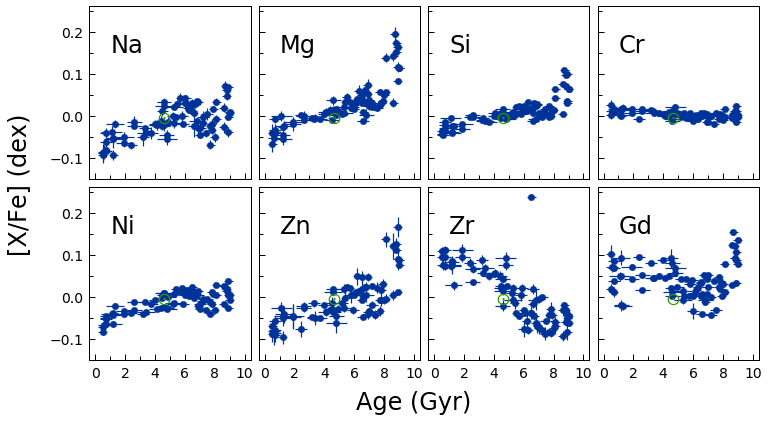

In [8]:
fig = plt.figure(figsize=(12,6.5))
for i,el in enumerate(elements):
    ax = fig.add_subplot(2,4,i+1)
    ax.errorbar(data['age'], data[el], xerr=data['age_err'], yerr=data[el+'_err'], 
                ls='None', marker=(1,3,0), mfc=c2, 
                ecolor=c2, mec=c2, mew=0.4, ms=6.5, elinewidth=1.2)
    ax.text(4.6, -0.005, r'$\odot$', horizontalalignment='center', 
                verticalalignment='center', color=c4, fontsize=18, weight='bold')
    ax.set_ylim([-0.15,0.26])
    ax.set_xlim([-0.4,10.4])
    ax.text(1.0,0.15,el.strip('I'), size=24, color=c1)

    ax.set_yticks(np.arange(-0.1,0.3,0.1))
    ax.set_yticks(np.arange(-0.1,0.3,0.05), minor=True)

    ax.set_xticks(np.arange(0,11,2))
    ax.set_xticks(np.arange(0,11,1), minor=True)

    ax.tick_params(axis='both', which='major', labelsize=14)

    if (i % 4) != 0:
        ax.set_yticklabels('',visible=False)

    if el not in elements[-4:]:
        ax.set_xticklabels('',visible=False)

fig.subplots_adjust(hspace=.05, wspace=.05)
fig.text(0.5, 0.02, 'Age (Gyr)', size=24, ha='center')
fig.text(0.03, 0.5, '[X/Fe] (dex)', rotation=90, size=24, va='center')
fig.savefig('gce_small.pdf')

#### sky plot of STs

In [14]:
import astropy
from astroquery.simbad import Simbad
import astropy.units as u
from tqdm import tqdm

In [15]:
n_star = len(data['star_name']) - 1
coords = []
for i in tqdm(range(n_star)):
    c = astropy.coordinates.get_icrs_coordinates(data['star_name'][i])
    coords = np.append(coords, c)

100%|██████████| 78/78 [02:05<00:00,  1.60s/it]


150.68478584437509 -44.86566993630275
350.0028701983267 -37.46500121627502
63.85307015753874 -13.216436895584595
17.39613764677356 -35.13067619919641
164.61085240492977 -58.52385248088876
44.78195373867867 -31.708025288370628
357.6529982825309 -44.449437396602185
317.5811142920546 -38.245078751900905


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/projections/geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


43.84200446101334 -47.0843826690389
358.6549915416345 -54.978894578861194
352.9151515602832 -64.85400237096596
18.30750692931184 -68.2574762452877
329.3223608496592 -59.753724579628795
81.75857826093076 -63.15189112752416
94.39547739077669 -55.13520636666668
84.3664748527795 -68.3854747268506
200.64082614946122 -65.38687338067626
196.93335665389196 -55.62858417118104
165.18942528399384 -36.03222056316944
224.80212159575177 -57.2785418560699
273.70138844116275 -43.3937742666994
311.5105093940096 -62.696811141783954
215.36379655901194 -34.80518957447378
220.16993163166737 -25.818372361514374
194.1721201470067 -5.5653987763450194
202.35797589402867 -5.5915221981383185
199.10517042837844 -3.5054661723062774
279.03211323816555 -28.04764671454465
252.62675035064953 -23.92123142330492
250.78813061911222 -22.760285250438805
251.38691859298177 -22.86210801788582
115.21162996706512 -69.94460303472431
238.9572197765957 -12.157293766616576
201.01408405307225 10.79189936161528
231.592457907152 1.15

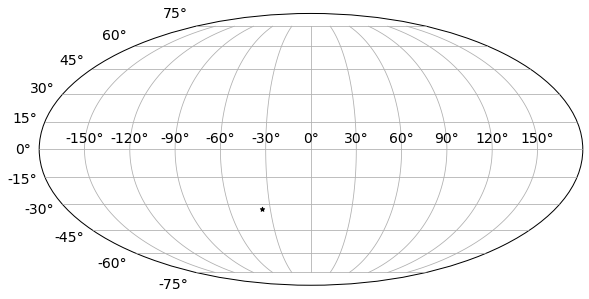

In [46]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(projection='mollweide')
for c in coords:
    #print(c.galactic)
    print(c.galactic.l.degree, c.galactic.b.degree)
    try:
        ax.scatter(c.galactic.l.degree, c.galactic.b.degree, marker='*', s=20, color='k')
    except:
        print('FAILED')
ax.grid(True)
#ax.set_xticklabels('')
#ax.set_yticklabels('');

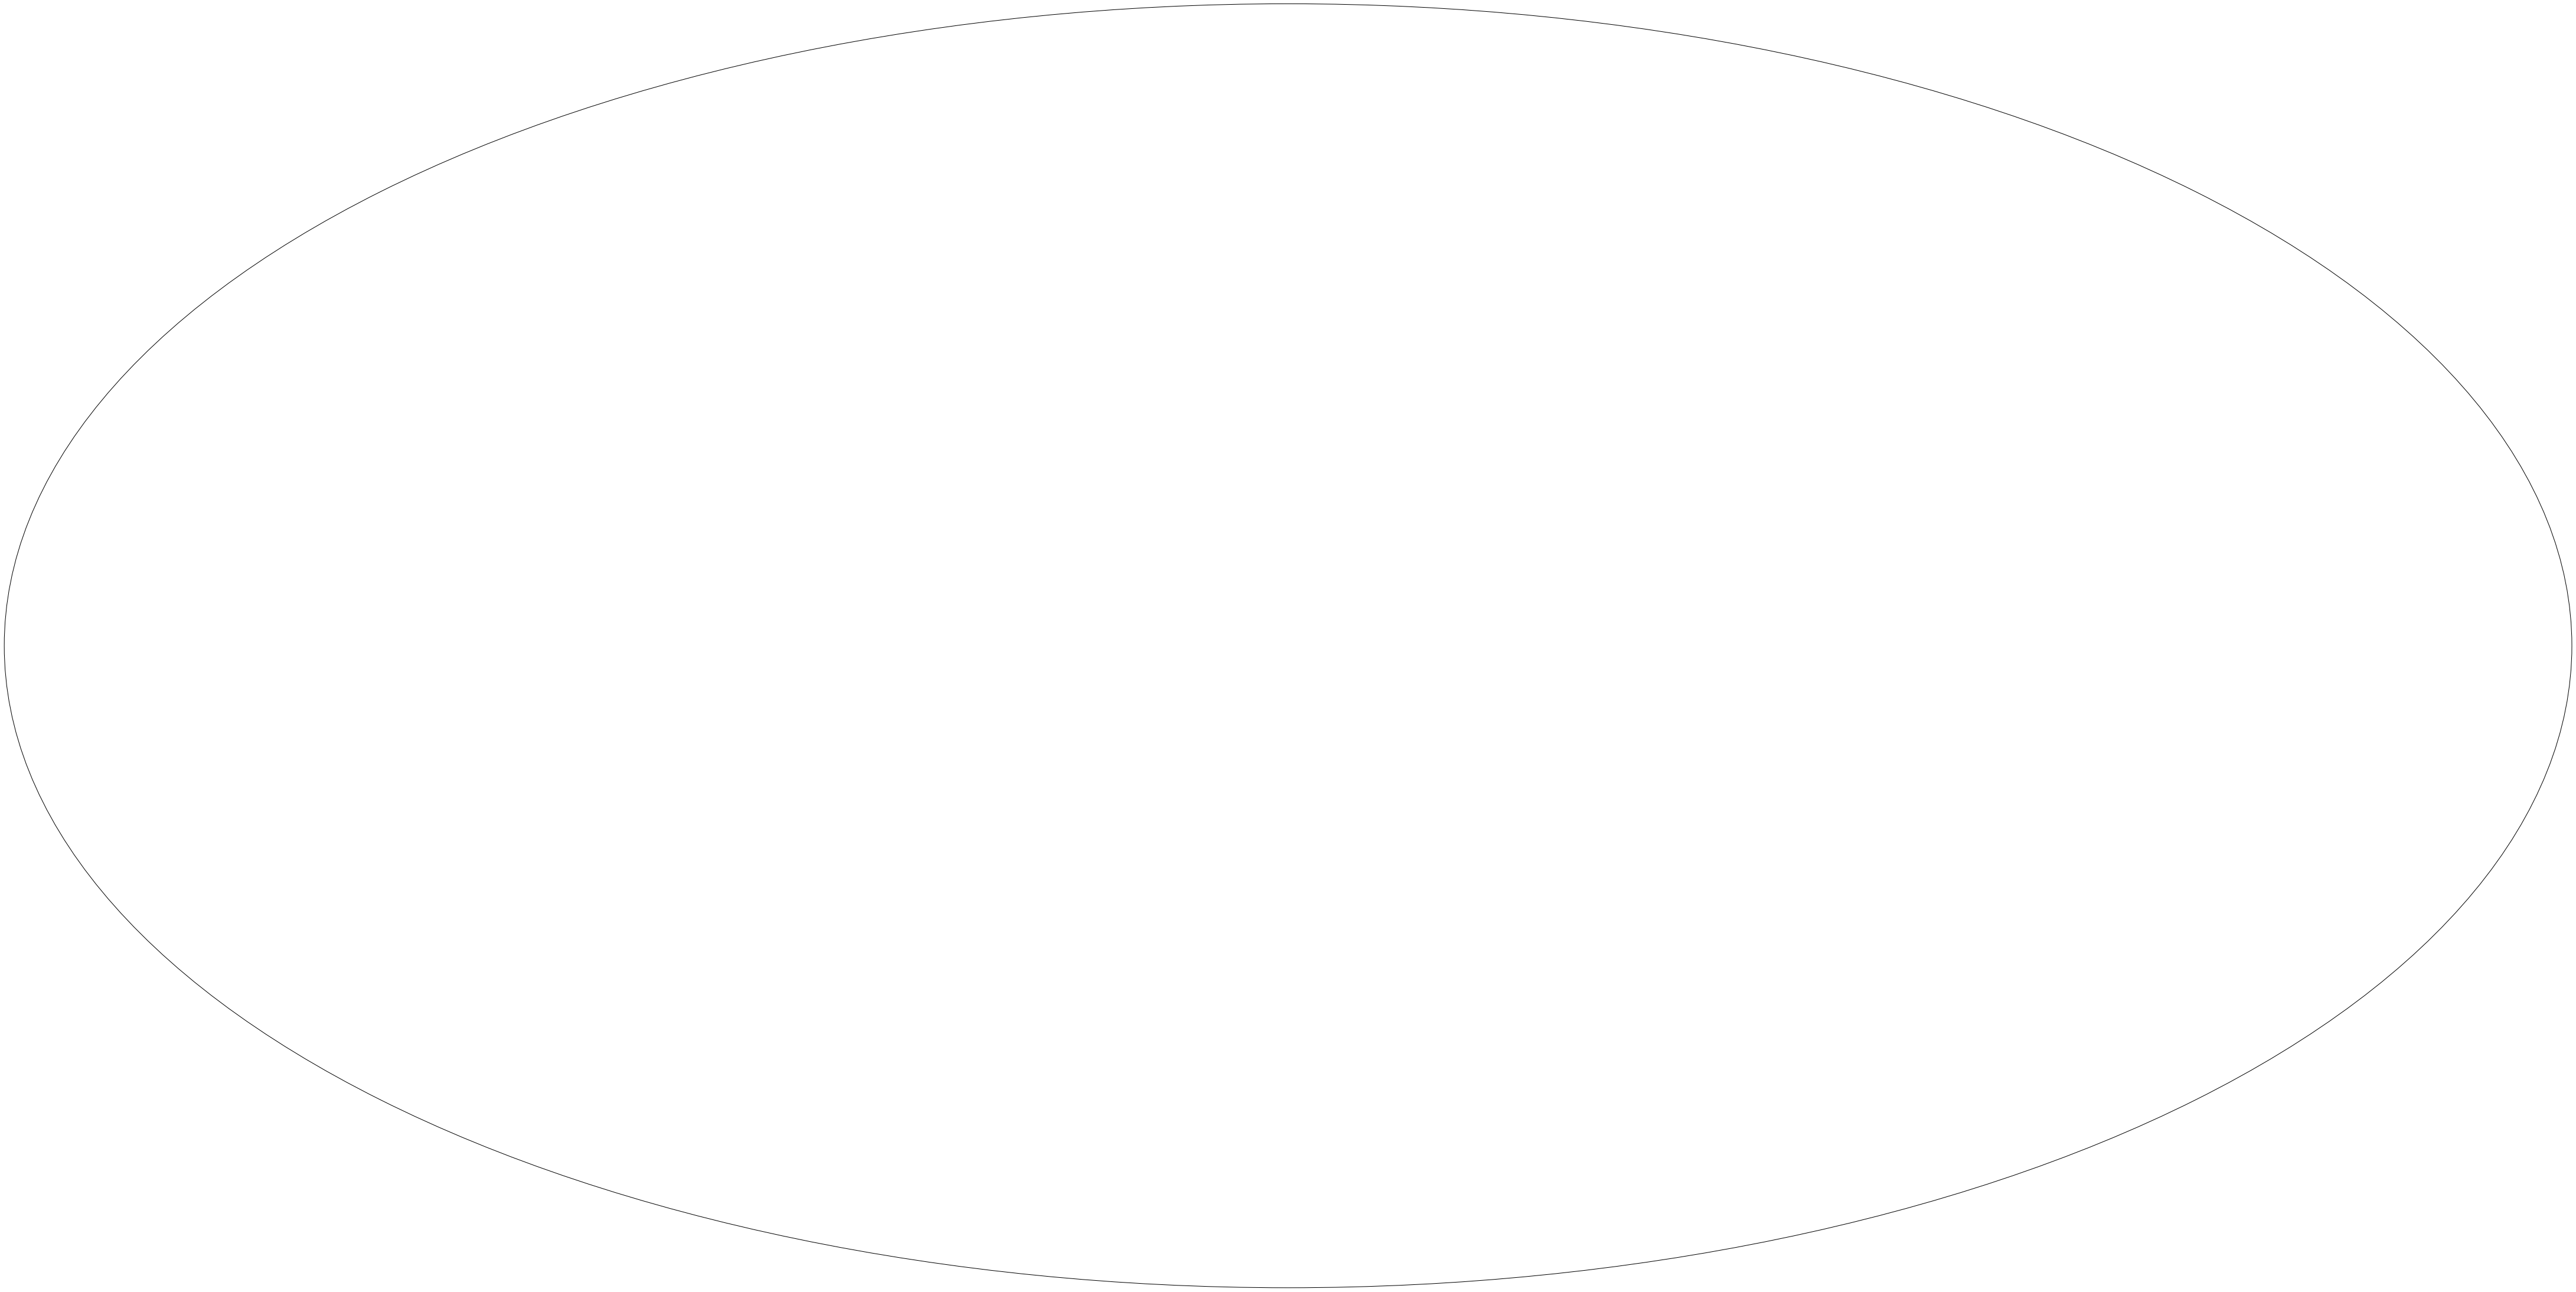

In [48]:
fig = plt.figure(figsize=(80, 40))
ax = plt.subplot(projection='mollweide')
for c in coords:
    ax.scatter(-1. * c.galactic.l.wrap_at(180*u.deg).radian, c.galactic.b.wrap_at(180*u.deg).radian, marker='*', s=1500, color='white') # HACK
#ax.grid(True)
ax.set_xticklabels('')
ax.set_yticklabels('')
fig.savefig('skyview_overlay.png', transparent=True);

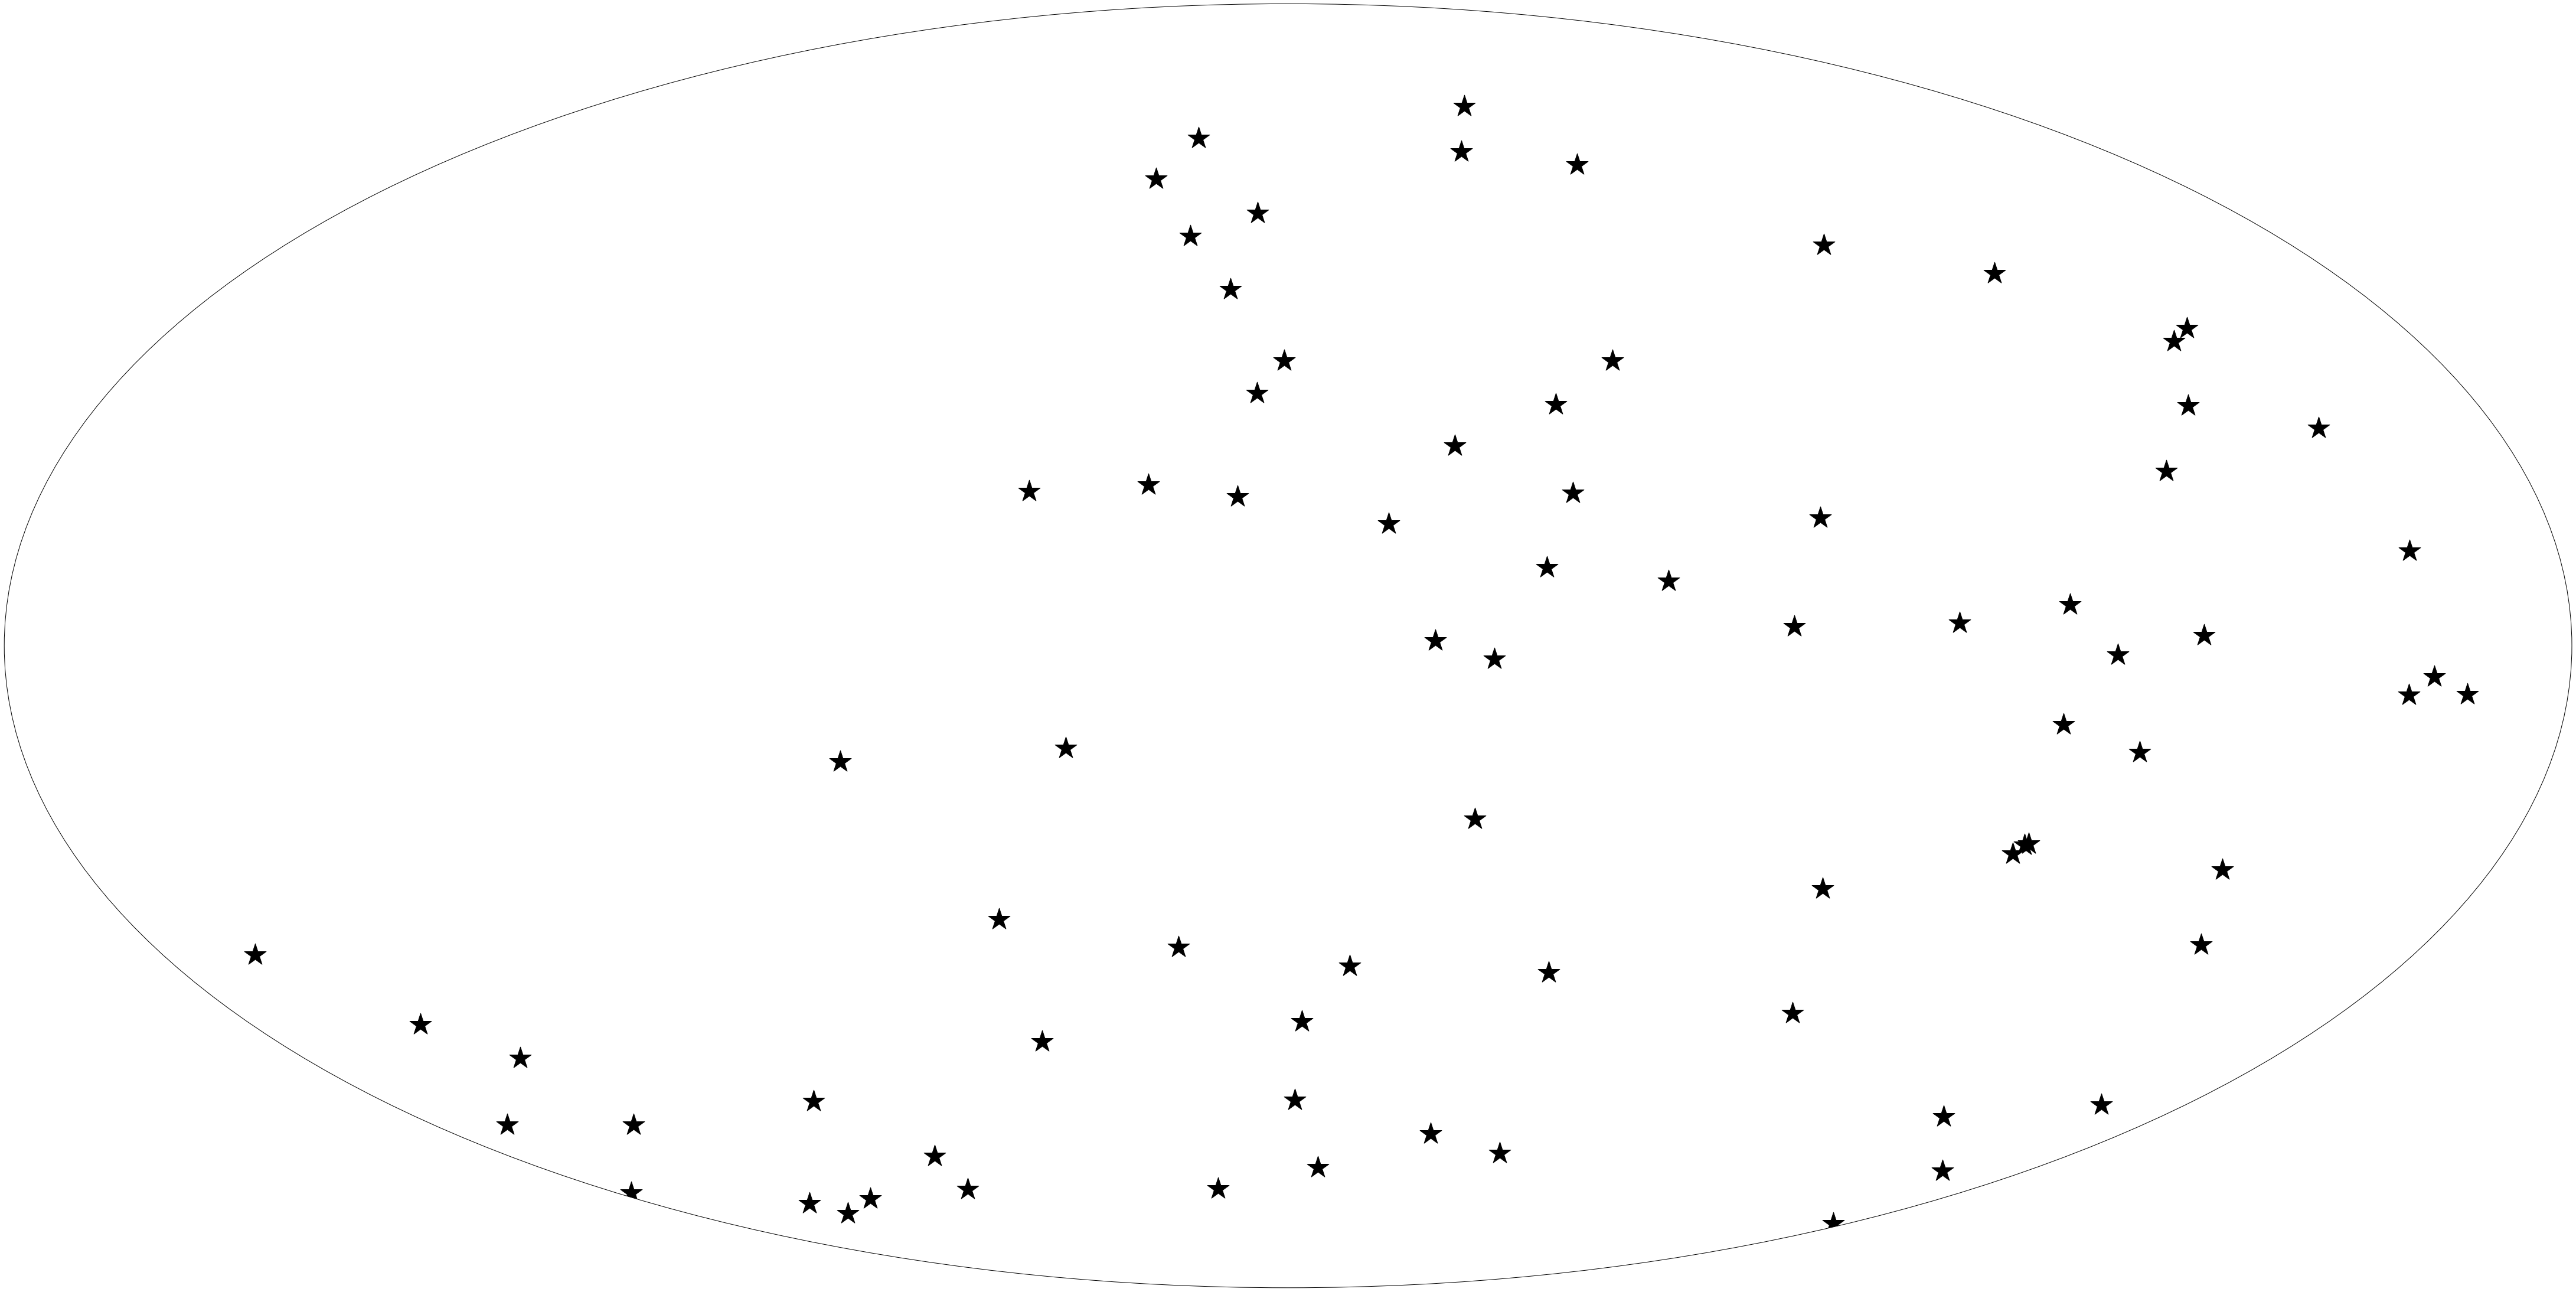

In [49]:
fig = plt.figure(figsize=(80, 40))
ax = plt.subplot(projection='mollweide')
for c in coords:
    ax.scatter(-1. * c.galactic.l.wrap_at(180*u.deg).radian, c.galactic.b.wrap_at(180*u.deg).radian, marker='*', s=1500, color='black') # HACK
#ax.grid(True)
ax.set_xticklabels('')
ax.set_yticklabels('')
fig.savefig('skyview.png', transparent=True);

#### isochrones plot

5741 4.52
5728 4.41


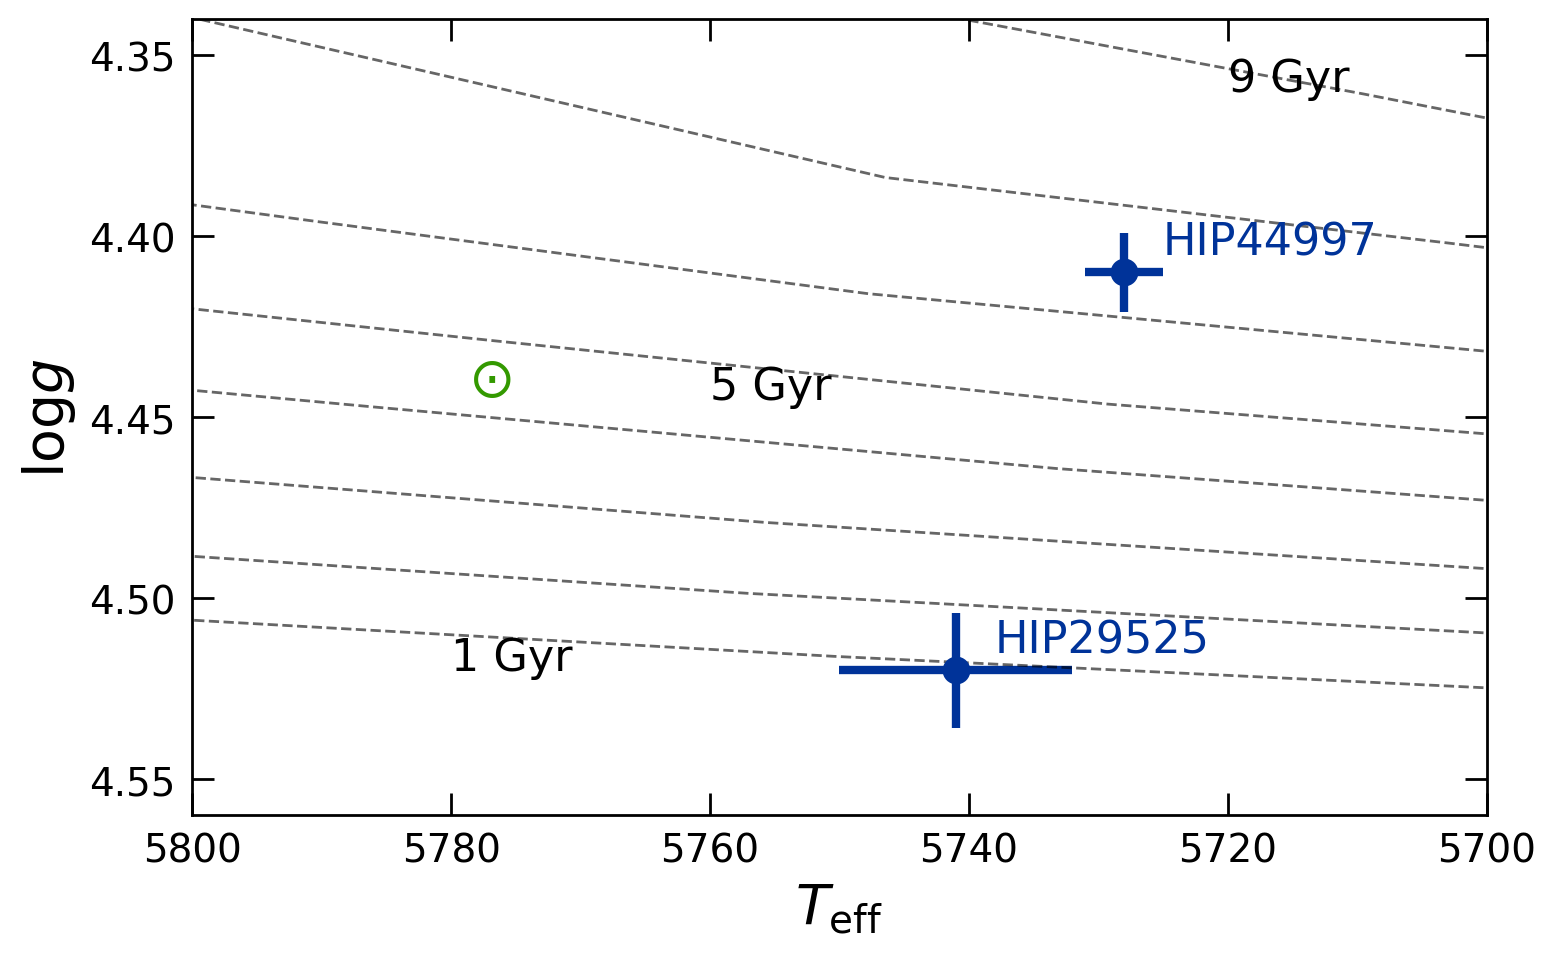

In [128]:
import q2
#star_inds = [5,44,62,65,67]
star_inds = [26,43]
fig = plt.figure(figsize=(8, 5), dpi=200)
ax = fig.add_subplot(111)
ax.set_xlim([5800,5700])
ax.set_ylim([4.56,4.34])
ax.set_ylabel(r'$\log g$',size=20)
ax.set_xlabel(r'$T_{\rm eff}$',size=20)
ax.yaxis.set_ticks(np.arange(4.35, 4.6, 0.05))
feh_offset = 0.04
ages = range(1, 10)
for age in ages:
    iso = q2.isopars.get_isochrone(age, -0.04, 'yy02.sql3')
    ax.plot(10.0**iso['logt'], iso['logg'], color=c1, alpha=0.6, ls='dashed', lw=1)
for i in star_inds:
    ax.errorbar(data['teff'][i], data['logg'][i], xerr=data['teff_err'][i], yerr=data['logg_err'][i],
                color=c2, ecolor=c2, fmt='o', markersize=8)
    ax.text(data['teff'][i]-3., data['logg'][i]-0.005, data['star_name'][i], color=c2, size=16)
    print(data['teff'][i], data['logg'][i])
ax.text(5777., 4.44, r'$\odot$', horizontalalignment='center', 
                verticalalignment='center', color=c4, fontsize=20, weight='bold')
ax.text(5780, 4.52, '1 Gyr', size=16, color=c1)
ax.text(5760, 4.445, '5 Gyr', size=16, color=c1)
ax.text(5720, 4.36, '9 Gyr', size=16, color=c1)
fig.tight_layout()
fig.savefig('isochrone_demo.png')

In [102]:
data[np.abs(data['feh']+0.01) <= 0.003]

star_name,teff,teff_err,logg,logg_err,feh,feh_err,age,age_err,mass,mass_err,thick_disk,CI,CI_err,CI_gce,CI_gce_err,CH,CH_err,CH_gce,CH_gce_err,OI,OI_err,OI_gce,OI_gce_err,NaI,NaI_err,NaI_gce,NaI_gce_err,MgI,MgI_err,MgI_gce,MgI_gce_err,AlI,AlI_err,AlI_gce,AlI_gce_err,SiI,SiI_err,SiI_gce,SiI_gce_err,SI,SI_err,SI_gce,SI_gce_err,CaI,CaI_err,CaI_gce,CaI_gce_err,ScI,ScI_err,ScI_gce,ScI_gce_err,ScII,ScII_err,ScII_gce,ScII_gce_err,TiI,TiI_err,TiI_gce,TiI_gce_err,TiII,TiII_err,TiII_gce,TiII_gce_err,VI,VI_err,VI_gce,VI_gce_err,CrI,CrI_err,CrI_gce,CrI_gce_err,CrII,CrII_err,CrII_gce,CrII_gce_err,MnI,MnI_err,MnI_gce,MnI_gce_err,CoI,CoI_err,CoI_gce,CoI_gce_err,NiI,NiI_err,NiI_gce,NiI_gce_err,CuI,CuI_err,CuI_gce,CuI_gce_err,ZnI,ZnI_err,ZnI_gce,ZnI_gce_err,SrI,SrI_err,SrI_gce,SrI_gce_err,YII,YII_err,YII_gce,YII_gce_err,ZrII,ZrII_err,ZrII_gce,ZrII_gce_err,BaII,BaII_err,BaII_gce,BaII_gce_err,LaII,LaII_err,LaII_gce,LaII_gce_err,CeII,CeII_err,CeII_gce,CeII_gce_err,PrII,PrII_err,PrII_gce,PrII_gce_err,NdII,NdII_err,NdII_gce,NdII_gce_err,SmII,SmII_err,SmII_gce,SmII_gce_err,EuII,EuII_err,EuII_gce,EuII_gce_err,GdII,GdII_err,GdII_gce,GdII_gce_err,DyII,DyII_err,DyII_gce,DyII_gce_err
bytes9,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HIP29525,5741,9,4.52,0.016,-0.012,0.007,1.2,0.6,1.002,0.008,False,-0.07300000000000001,0.02,-0.034905757,0.020534885,-0.079,0.014,-0.040905757,0.014754033,0.0010000000000000009,0.014,0.030027403,0.014701293,-0.05500000000000001,0.021,-0.026491976,0.021607606,-0.05600000000000001,0.015,-0.023214997,0.015254339,-0.07200000000000001,0.028,-0.026212579,0.028186283,-0.041999999999999996,0.004,-0.021125118,0.00446572,-0.0009999999999999992,0.031,0.031274524,0.031416508,0.015,0.009,0.011353355,0.009192075,0.009000000000000001,0.021,0.028600276,0.021227529,-0.064,0.013,-0.044399724,0.01336443,-0.011,0.01,0.000919276,0.010143438,-0.030000000000000002,0.011,-0.018080724,0.011130558,-0.018,0.014,-0.013670583,0.014161415,0.014,0.011,0.008818673,0.0110476,0.02,0.013,0.014818673,0.013040301,-0.038000000000000006,0.01,-0.03030535,0.010708111,-0.053000000000000005,0.011,-0.028561284,0.01151305,-0.066,0.007,-0.042622367,0.007607641,-0.11800000000000001,0.026,-0.068879023,0.026581918,-0.046,0.011,-0.012433283,0.011911653,0.09,0.012,0.007096729,0.015556557,0.086,0.013,0.007360198,0.015172514,0.075,0.022,0.002758374,0.023276469,0.20600000000000002,0.012,0.101519086,0.013283775,0.14600000000000002,0.014,0.071089323,0.015614938,0.15100000000000002,0.015,0.078429204,0.016134609,0.126,0.024,0.091951365,0.025323053,0.119,0.009,0.053621131,0.011146702,0.048,0.046,0.022710645,0.046320069,0.03,0.03,0.01147506,0.030495516,0.093,0.018,0.07319825,0.018705913,0.20700000000000002,0.073,0.182785778,0.073379045
HIP44997,5728,3,4.41,0.011,-0.012,0.003,6.6,0.4,0.97,0.001,False,-0.048,0.019,-0.072241791,0.019229668,-0.043,0.007,-0.067241791,0.007601323,0.044,0.016,0.025528017,0.016252723,-0

In [104]:
np.where(data['star_name'] == 'HIP44997')

(array([43]),)